In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/heart_disease.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [3]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


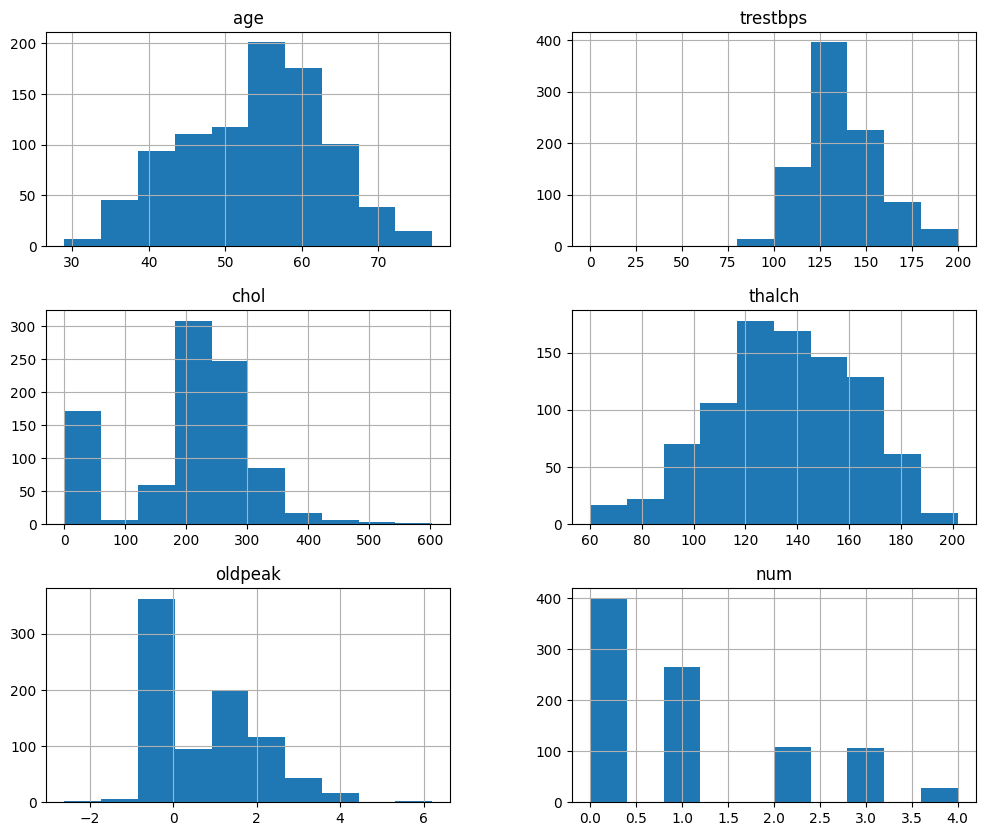

In [4]:
# Visualize the distribution of features
data.hist(figsize=(12, 10))
plt.show()

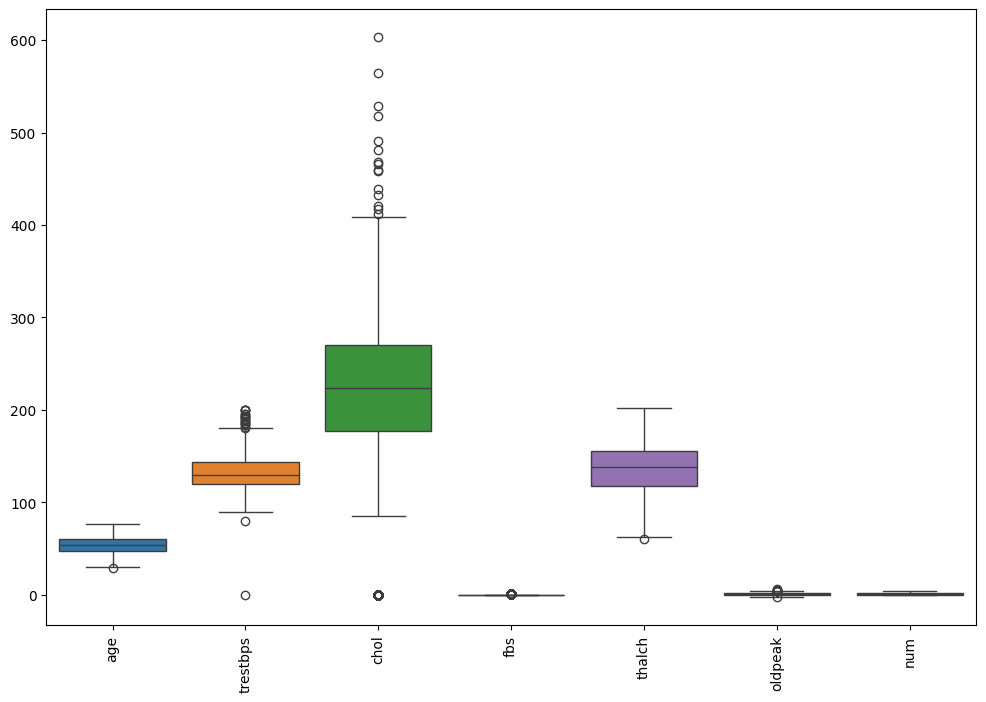

In [5]:
# Box plots for detecting outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define the features and target variable
X = data.drop('num', axis=1)
y = data['num']

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numerical features to scale
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale features
])

# Categorical features to encode
categorical_features = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode
])
# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
# the Decision Tree model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Predict probabilities for ROC-AUC calculation
y_prob = model.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)



Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.81      0.75        89
           1       0.45      0.38      0.41        48
           2       0.29      0.23      0.26        22
           3       0.19      0.24      0.21        17
           4       0.00      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.33      0.33      0.33       182
weighted avg       0.52      0.54      0.53       182

Confusion Matrix:
[[72 11  3  3  0]
 [16 18  6  8  0]
 [ 7  3  5  6  1]
 [ 6  5  1  4  1]
 [ 1  3  2  0  0]]
ROC-AUC Score: 0.5970401919931888


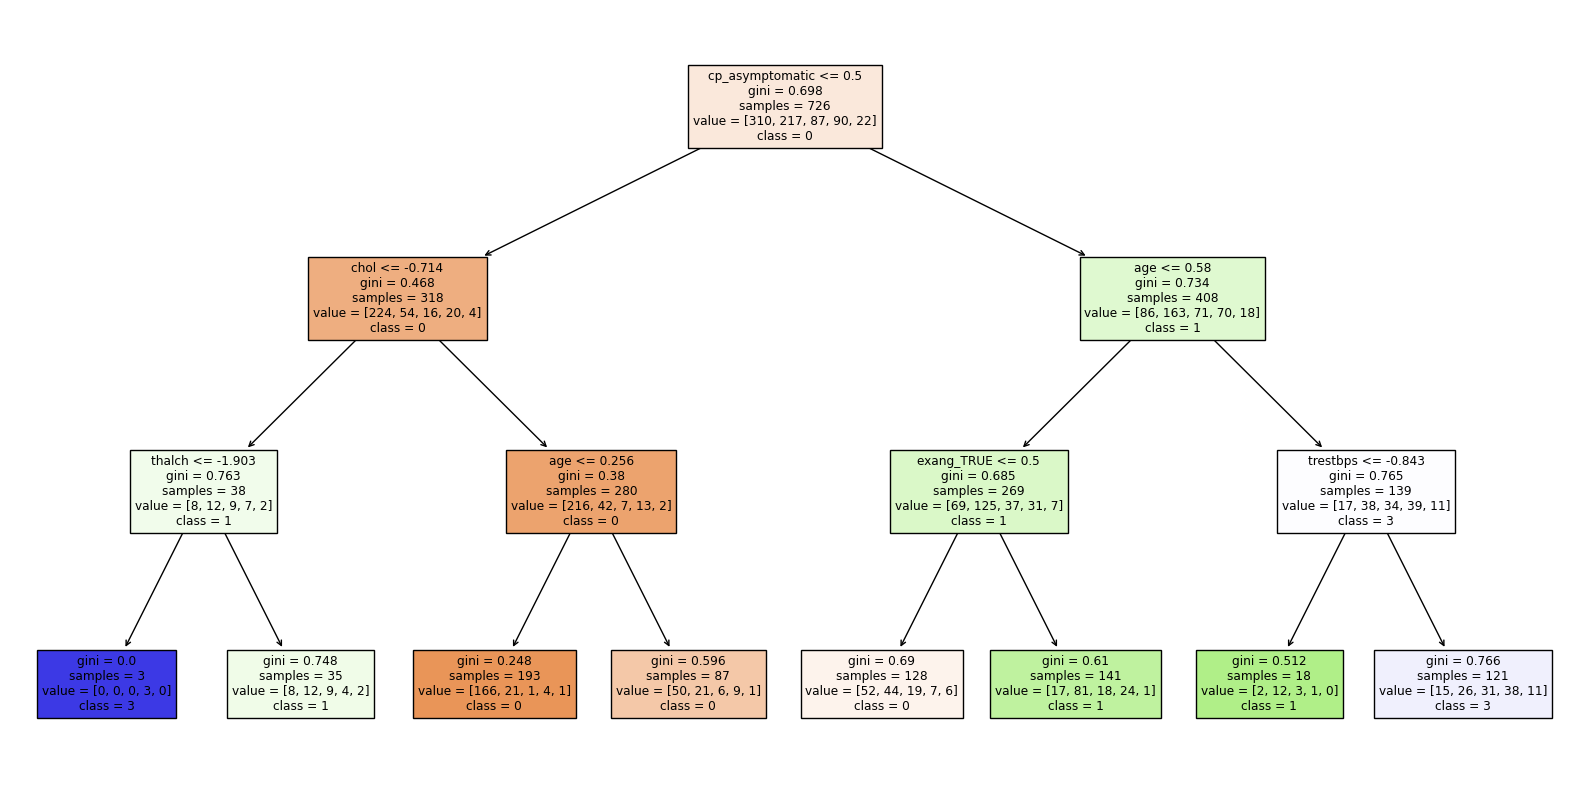

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the best decision tree
plt.figure(figsize=(20,10))

# Extract the DecisionTreeClassifier from the pipeline
tree_classifier = best_model.named_steps['classifier']

# Retrieve the feature names after the one-hot encoding
encoded_feature_names = best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_features)

# Combine numerical and encoded feature names
feature_names = list(numerical_features) + list(encoded_feature_names)

# Plot
plot_tree(tree_classifier, filled=True, feature_names=feature_names, class_names=['0', '1', '2', '3', '4'], max_depth=3)  # Limiting depth for better visualization

plt.show()


In [ ]:
'''  Q.1. Common Hyperparameters of Decision Tree Models and Their Impact on Performance
Decision Tree models have several hyperparameters that significantly influence their performance and behavior.
Here are some key hyperparameters:

max_depth:

Description: The maximum depth of the tree.
Impact: Controls how deep the tree can grow.
A deeper tree can capture more complex patterns but may also overfit the training data. A shallow tree may underfit, missing important patterns.

min_samples_split:
Description: The minimum number of samples required to split an internal node.
Impact: Higher values prevent the model from creating nodes that only classify a few samples, which reduces overfitting. Lower values allow the tree to grow more complex.

min_samples_leaf:
Description: The minimum number of samples that a leaf node must have.
Impact: Helps prevent overfitting by ensuring that leaf nodes have enough data to make a reliable prediction. Higher values increase bias but reduce variance.

max_features:
Description: The number of features to consider when looking for the best split.
Impact: Limits the number of features to consider for splits, which can lead to a more generalized model. If set to None, all features are considered.

criterion:
Description: The function used to measure the quality of a split (e.g., gini for Gini impurity, entropy for information gain).
Impact: Determines how the model selects the best splits. Both Gini and entropy typically yield similar results,
but they may slightly differ depending on the dataset.

max_leaf_nodes:
Description: The maximum number of leaf nodes in the tree.
Impact: Limits the number of leaf nodes, which can prevent overfitting. A smaller number results in a more generalized model.'''


In [ ]:
''' Q.2. Difference Between Label Encoding and One-Hot Encoding
Label Encoding and One-Hot Encoding are two techniques used to convert categorical data into a numerical format that machine learning algorithms can process.

Label Encoding:
Description: Converts categorical values into integer codes. Each unique category is assigned a unique integer.

Example:
Suppose you have a column Color with categories: Red, Blue, Green.
Label Encoding might convert Red to 0, Blue to 1, and Green to 2.
When to Use: Useful when the categorical feature is ordinal, meaning the categories have an inherent order (e.g., Low, Medium, High).
Impact: The model might assume a relationship between the encoded integers, which can introduce bias if the categories are not ordinal.


One-Hot Encoding:

Description: Converts each category into a new binary column. Each category becomes a column, and rows are marked with 1 or 0 depending on whether they belong to that category.

Example:
For the same Color column: Red, Blue, Green, One-Hot Encoding would create three columns (Color_Red, Color_Blue, Color_Green), with a 1 in the appropriate column.
When to Use: Suitable for nominal categorical features where there’s no ordinal relationship between categories.
Impact: Increases the dimensionality of the data, which can be computationally expensive but prevents the model from assuming a relationship between categories.